## Отчёты и автоматизация

### Задание: сборка PDF документа

Используя данные по посещаемости библиотек в районах Москвы

https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json

постройте круговую диаграмму суммарной посещаемости (NumOfVisitors) 20 наиболее популярных районов Москвы.
Создайте PDF отчет, используя файл

https://video.ittensive.com/python-advanced/title.pdf

как первую страницу. На второй странице выведите итоговую диаграмму, самый популярный район Москвы и число посетителей библиотек в нем.

Сколько посетителей библиотек в районе Москвы с самой большой суммарной посещаемостью библиотек?

###############################################################################################################################

Импортируем необходимые библиотеки.

In [1]:
import json
import pandas as pd
import requests
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import matplotlib.pyplot as plt
import seaborn as sns
from PyPDF2 import PdfFileMerger, PdfFileReader
%matplotlib inline

Создаём запрос к json файлу через requests и загружаем данные в датафрейм. Убираем колонку с отсутствующими значениями. Создаём колонку для данных по районам Москвы и инициализируем значения в ней нулями.

In [2]:
req = requests.get('https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json')
df = pd.DataFrame(json.loads(req.content)).fillna(value = 0)
df.sort_values('NumOfVisitors', ascending = False, inplace = True)
df.reset_index(drop = True, inplace = True)
df['District'] = 0
df.head()

,global_id,NumOfVisitors,Category,CommonName,FullName,ShortName,ChiefOrg,OrgInfo,ObjectAddress,ChiefName,...,PublicPhone,Fax,Email,WorkingHours,ClarificationOfWorkingHours,WebSite,NumOfSeats,NumOfReaders,geoData,District
0,870507232,588995.0,Библиотека,Библиотека имени Н. А. Некрасова,Государственное бюджетное учреждение культуры ...,ГБУК г. Москвы «Центральная библиотека им. Н.А...,0,"[{'OGRN': '1027739406815', 'ChiefName': 'Прива...","[{'PostalCode': '105005', 'District': 'Басманн...",Привалова Мария Александровна,...,"[{'PublicPhone': ['(495) 916-90-68']}, {'Publi...",[{'Fax': ['(495) 916-90-68']}],[{'Email': ['biblioteka@nekrasovka.ru']}],"[{'WorkHours': '10:00-22:00', 'DayWeek': 'поне...",Последний вторник каждого месяца - санитарный ...,nekrasovka.ru,179.0,48776.0,"{'type': 'MultiPoint', 'coordinates': [[37.678...",0
1,477012705,559500.0,Библиотека,Библиотека №151,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ЦБС ЮАО», Библиотека №151",Государственное бюджетное учреждение культуры ...,"[{'OGRN': '1037739667888', 'ChiefName': 'Красн...","[{'PostalCode': '117648', 'District': 'район Ч...",Трофимова Ирина Юрьевна,...,"[{'PublicPhone': ['(495) 318-79-29']}, {'Publi...",[{'Fax': ['(499) 610-29-00']}],[{'Email': ['151libzav@cbsuao.ru']}],"[{'WorkHours': 'выходной', 'DayWeek': 'понедел...",Последний рабочий день месяца - санитарный. Дл...,bibliouao.ru,800.0,76900.0,"{'type': 'MultiPoint', 'coordinates': [[37.598...",0
2,477013101,504200.0,Библиотека,Библиотека №163,Государственное бюджетное учреждение культуры ...,"ГБУК г. Москвы «ЦБС ЮАО», Библиотека №163",Государственное бюджетное учреждение культуры ...,"[{'OGRN': '1037739667888', 'ChiefName': 'Красн...","[{'PostalCode': '115114', 'District': 'Данилов...",Кирьянова Людмила Николаевна,...,[{'PublicPhone': ['(495) 952-96-53']}],[],[{'Email': ['163libzav@cbsuao.ru']}],"[{'WorkHours': 'выходной', 'DayWeek': 'понедел...",Последняя пятница месяца - санитарный день. Гр...,bibliouao.ru,490.0,69600.0,"{'type': 'MultiPoint', 'coordinates': [[37.629...",0
3,477012953,227302.0,Библиотека,Библиотека-читальня имени И.С. Тургенева,Государственное бюджетное учреждение культуры ...,ГБУК г. Москвы «Библиотека-читальня им. И.С. Т...,0,"[{'OGRN': '1027739881960', 'ChiefName': 'Крыло...","[{'PostalCode': '101000', 'District': 'Краснос...",Крылов-Иодко Ромуальд Ромуальдович,...,"[{'PublicPhone': ['(495) 623-11-68']}, {'Publi...",[],[{'Email': ['biblioteka@turgenev.ru']}],"[{'WorkHours': 'выходной', 'DayWeek': 'понедел...",Санитарный день - последний вторник месяца. В ...,turgenev.ru,139.0,7789.0,"{'type': 'MultiPoint', 'coordinates': [[37.634...",0
4,477012297,143224.0,Библиотека,Библиотека искусств имени А. П. Боголюбова,Государственное бюджетное учреждение культуры ...,ГБУК г. Москвы «Библиотека искусств им. А. П. ...,0,"[{'OGRN': '1037739279412', 'ChiefName': 'Семен...","[{'PostalCode': '127055', 'District': 'Тверско...",Семенов Владимир Олегович,...,[{'PublicPhone': ['(499) 973-14-94']}],[{'Fax': ['(499) 973-14-94']}],[{'Email': ['bogolubovlib@yandex.ru']}],"[{'WorkHours': 'выходной', 'DayWeek': 'понедел...",Санитарный день - последний вторник месяца. Гр...,bogolublib.ru,148.0,16345.0,"{'type': 'MultiPoint', 'coordinates': [[37.602...",0


Заполняем значения в колонке районов данными из адресов объектов. Сокращаем название районов.

In [3]:
for ind, address in enumerate(df.ObjectAddress):
    for district in address:
        df['District'][ind] = district['District'].replace('район', '').strip()

D:\Anaconda\envs\AI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\AI\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Группируем данные по районам и сортируем их по числу посетителей. Выводим первые строки.

In [4]:
grouped_data = df.groupby('District').sum()
grouped_data.sort_values('NumOfVisitors', ascending = False, inplace = True)
grouped_data.head()

,global_id,NumOfVisitors,NumOfSeats,NumOfReaders
District,,,,
Басманный,3266146866,734934.0,192.0,67824.0
Чертаново Центральное,477012705,559500.0,800.0,76900.0
Даниловский,477013101,504200.0,490.0,69600.0
Красносельский,1431038384,284078.0,201.0,17613.0
Арбат,2514537275,239711.0,244.0,34828.0


Выводим число посетителей библиотек в районе с наибольшей суммарной посещаемостью.

In [6]:
int(grouped_data.iloc[0][1])

734934

Отрисовываем диаграмму двадцати районов Москвы с наибольшей суммарной посещаемостью библиотек. 

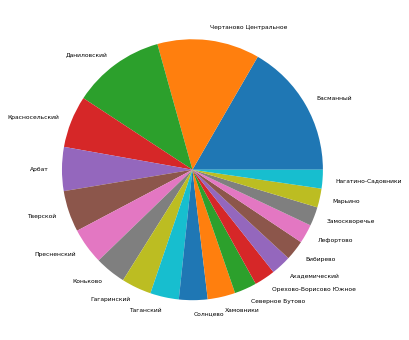

In [7]:
top_20 = grouped_data[:20]
top_20.NumOfVisitors.plot.pie(label = '', figsize = (6, 6), fontsize = 6)
plt.savefig('Districts.png')

Создаём pdf отчёт с нужными данными и диаграммой.

In [8]:
pdfmetrics.registerFont(TTFont('Vera', 'Vera.ttf'))
PDF = canvas.Canvas('districts.pdf', pagesize=pagesizes.A4)
PDF.setFont('Vera', 20)
PDF.drawString(100, 250, grouped_data.index[0] + ' район: ' + str(int(grouped_data.iloc[0][1])) + ' посетителей')
PDF.drawImage(ImageReader('Districts.png'), 75, 350)
PDF.save()

Производим слияние нашего отчёта с титульной страницей и получаем финальную версию отчёта.

In [9]:
files = ["title.pdf", "districts.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))
merger.addMetadata({
    '/Producer': "ITtensive",
    '/Author': "ITtensive",
    '/Creator': "Anton Popkov",
    '/Copyright': "ITtensive 2019",
    '/Title': "Культурная статистика Москвы"
})
merger.write("report.pdf")

### Задание: геральдические символы Москвы

Сгенерируйте PDF документ из списка флагов и гербов районов Москвы:

https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv

На каждой странице документа выведите название геральдического символа (Name), его описание (Description) и его изображение (Picture).
Для показа изображений используйте адрес

https://op.mos.ru/MEDIA/showFile?id=XXX

где XXX - это значение поля Picture в наборе данных. Например:

https://op.mos.ru/MEDIA/showFile?id=8466da35-6801-41a9-a71e-04b60408accb

Если на каждой странице PDF документа выводить по одному геральдическому символу, то сколько получится страниц?

###############################################################################################################################

Импортируем библиотеки:

In [10]:
import numpy as np
import pandas as pd
import pdfkit
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from PyPDF2 import PdfFileMerger, PdfFileReader
from reportlab.lib.utils import ImageReader

Считываем данные в датафрейм. Убираем колонку с отсутствующими значениями.

In [11]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv', 
                 sep = ';', index_col = 'ID').dropna(axis = 1)
df.head()

,Name,Type,Picture,Description,Semantics,global_id
ID,,,,,,
1,Герб муниципального округа Новокосино в городе...,Герб,4b29170f-c81c-4418-9669-50bb4f419878,В четырежды рассечённом пурпурном и серебряном...,"Новокосино - уютный уголок столицы, примыкающи...",881376735
2,Флаг муниципального округа Новокосино в городе...,Флаг,3aaf306c-3d1e-40f8-9388-838c8f3ed923,Прямоугольное двухстороннее полотнище с отноше...,"Новокосино - уютный уголок столицы, примыкающи...",881376867
3,Герб муниципального округа Нагатино-Садовники ...,Герб,8e8a775e-bb48-4606-a4b1-769ae45efc87,В зелёном поле на чёрной земле - золотая яблон...,"Зелёный цвет щита символизирует заливные луга,...",881376945
4,Флаг муниципального округа Нагатино-Садовники ...,Флаг,95d4ead4-d9e8-4de4-8d86-03dd0214d4d9,Прямоугольное двухстороннее полотнище зелёного...,"Зелёный цвет щита символизирует заливные луга,...",881384742
5,Герб муниципального округа Марфино в городе Мо...,Герб,4e0b7f34-f186-40e6-a731-dbc1ade83025,Зелёное и лазоревое поле разделено фигурной пе...,"Лист березы совместно с отрезками нитей, вылож...",881396305


Выводим небольшую статистику по данным:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         42 non-null     object
 1   Type         42 non-null     object
 2   Picture      42 non-null     object
 3   Description  42 non-null     object
 4   Semantics    42 non-null     object
 5   global_id    42 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.3+ KB


In [13]:
descr_len = [len(i) for i in df.Description]
print(np.max(descr_len))
print(np.min(descr_len))
print(np.mean(descr_len))

496
70
241.92857142857142


In [14]:
name_len = [len(i) for i in df.Name]
print(np.max(name_len))
print(np.min(name_len))
print(np.mean(name_len))

61
36
50.333333333333336


Создаём титульную страницу для отчёта:

In [15]:
title_page = canvas.Canvas('title_page.pdf', pagesize = pagesizes.A4)
pdfmetrics.registerFont(TTFont('TNR', 'times.ttf'))
title_page.setFont('TNR', 40)
title_page.drawString(150, 550, 'Геральдические')
title_page.drawString(180, 500, 'Символы')
title_page.drawString(185, 450, 'Москвы')
title_page.setFont('TNR', 14)
title_page.drawString(490, 50, 'Автор:')
title_page.drawString(490, 35, 'Попков Антон')
title_page.save()

Функция для разбивки длинных описаний на строки. Разбивка необходима для дальнейшего нанесения на страницу описаний без переносов.

In [16]:
def split_string(st):
    ls = st.split()
    str_list = []
    for i in range(0, len(ls) + 10, 10):
        str_list.append(' '.join(ls[i:i + 10]))
    return str_list

Создаём финальный отчёт. Итерируем по ссылкам на картинки и наносим их на страницу. Затем наносим имена и описания.

In [17]:
merger = PdfFileMerger()
merger.append(PdfFileReader(open('title_page.pdf', 'rb')))
for ind, emblem in enumerate(df.Picture):
    page = canvas.Canvas(f'page.pdf', pagesize=pagesizes.A4)
    page.drawImage(ImageReader('https://op.mos.ru/MEDIA/showFile?id=' + emblem), 150, 350)
    page.setFont('TNR', 18)
    page.drawString(50, 750, df.Name[ind + 1])
    page.setFont('TNR', 10)
    upper_bound = 150
    for st in split_string(df.Description[ind + 1]):
        page.drawString(100, upper_bound, st)
        upper_bound -= 10
    page.save()
    merger.append(PdfFileReader(open('page.pdf', 'rb')))
merger.write('emblems.pdf')

### Задание: многостраничный отчет

Используя данные по активностям в парках Москвы

https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json

Создайте PDF отчет, в котором выведите:

1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк

Сколько активностей Тайцзицюань есть в парках Москвы?

###############################################################################################################################

Импрортируем библиотеки.

In [1]:
import pandas as pd
import requests
import json
import pdfkit
import binascii
from jinja2 import Template
import matplotlib.pyplot as plt
%matplotlib inline

Делаем запрос к json файлу и конвертируем его в датафрейм.

In [2]:
req = requests.get('https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json')
df = pd.DataFrame(json.loads(req.content))
df.reset_index()
df.set_index('ID', inplace = True)
df.head()

,global_id,CoursesTimetable,HelpPhone,NameOfPark,CourseName,CoursesDescription,PaidService
ID,,,,,,,
1,1019998364,"Воскресенье, 16:00–17:00, 17:00–18:00","[{'global_id': 78.0, 'HelpPhone': '(926) 600-1...","{'global_id': 4331848, 'value': 'Сад культуры ...",Английский язык для детей,В непринужденной игровой обстановке участники ...,Бесплатно
2,1019998365,"Пятница, 20:30–22:00","[{'global_id': 80.0, 'HelpPhone': '(926) 600-1...","{'global_id': 4331848, 'value': 'Сад культуры ...",Киноклуб на английском языке,Для гостей сада от 16 лет проходят встречи язы...,Бесплатно. Необходима предварительная регистра...
3,1019999999,"Воскресенье, 14:00–16:00","[{'global_id': 81.0, 'HelpPhone': '(926) 210-3...","{'global_id': 4331848, 'value': 'Сад культуры ...",Цигун на открытом воздухе,Занятия проходят по методу фалунь дафа — совер...,Бесплатно
4,1020000044,"Суббота, 17:00–18:00","[{'global_id': 82.0, 'HelpPhone': '(499) 261-5...","{'global_id': 4331848, 'value': 'Сад культуры ...",Мастер-классы по парным танцам на льду,На катке в саду имени Баумана будут организова...,Бесплатно
5,1020000047,"Вторник, 15:00–16:00, с декабря","[{'global_id': 83.0, 'HelpPhone': '(499) 261-5...","{'global_id': 4331848, 'value': 'Сад культуры ...",Мастерские театрального художника,На встречах с детским театром «Домик Фанни Бэл...,Бесплатно


Извлекаем имена парков из колонки NameOfPark.

In [3]:
df.NameOfPark = df.NameOfPark.apply(lambda x: x['value'])
df.head()

,global_id,CoursesTimetable,HelpPhone,NameOfPark,CourseName,CoursesDescription,PaidService
ID,,,,,,,
1,1019998364,"Воскресенье, 16:00–17:00, 17:00–18:00","[{'global_id': 78.0, 'HelpPhone': '(926) 600-1...",Сад культуры и отдыха имени Н.Э. Баумана,Английский язык для детей,В непринужденной игровой обстановке участники ...,Бесплатно
2,1019998365,"Пятница, 20:30–22:00","[{'global_id': 80.0, 'HelpPhone': '(926) 600-1...",Сад культуры и отдыха имени Н.Э. Баумана,Киноклуб на английском языке,Для гостей сада от 16 лет проходят встречи язы...,Бесплатно. Необходима предварительная регистра...
3,1019999999,"Воскресенье, 14:00–16:00","[{'global_id': 81.0, 'HelpPhone': '(926) 210-3...",Сад культуры и отдыха имени Н.Э. Баумана,Цигун на открытом воздухе,Занятия проходят по методу фалунь дафа — совер...,Бесплатно
4,1020000044,"Суббота, 17:00–18:00","[{'global_id': 82.0, 'HelpPhone': '(499) 261-5...",Сад культуры и отдыха имени Н.Э. Баумана,Мастер-классы по парным танцам на льду,На катке в саду имени Баумана будут организова...,Бесплатно
5,1020000047,"Вторник, 15:00–16:00, с декабря","[{'global_id': 83.0, 'HelpPhone': '(499) 261-5...",Сад культуры и отдыха имени Н.Э. Баумана,Мастерские театрального художника,На встречах с детским театром «Домик Фанни Бэл...,Бесплатно


Группируем число активностей по паркам.

In [4]:
actions = df.groupby('NameOfPark').count()['CourseName'].sort_values(ascending = False)
top_10 = actions[actions > 5]
top_10

NameOfPark
Парк Сокольники                                41
Парк Таганский (Основная территория)           18
Парк «Ходынское поле» (основная территория)    15
Парк «Фили»                                    13
Парк Победы на Поклонной горе                  13
Воронцовский парк                              13
Парк «Северное Тушино»                         10
Измайловский парк                               8
Сад культуры и отдыха имени Н.Э. Баумана        6
Ландшафтный парк «Митино»                       6
Парк «Зарядье»                                  6
Парк Бабушкинский (основная территория)         6
Сквер по Олонецкому проезду                     6
Name: CourseName, dtype: int64

Визуализируем количество активностей с помощью диаграммы.

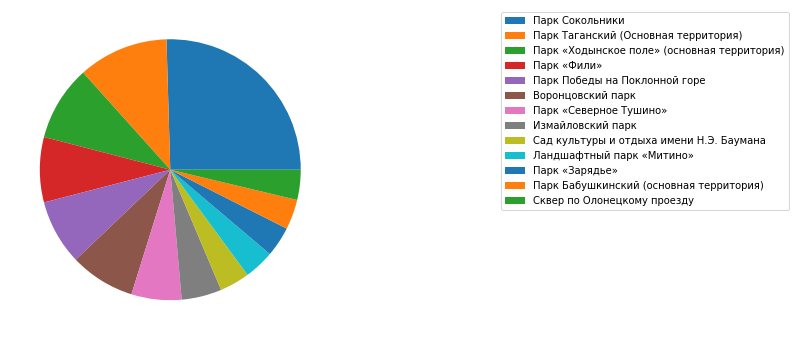

In [5]:
fig = plt.figure(figsize = (12, 6))
area = fig.add_subplot(1, 1, 1)
top_10.plot.pie(ax = area, labels = ['']*13, label = '', figsize = (6, 6), fontsize = 8)
plt.legend(top_10.index, bbox_to_anchor = (1.5, 1, 0.1, 0))
plt.savefig('top-10_parks.png', bbox_inches="tight")

Ищем активности "Тайцзицюань" в парках Москвы.

In [6]:
table = df[['CourseName', 'CoursesTimetable', 'NameOfPark']]
table.loc[table.CourseName == 'Тайцзицюань']

,CourseName,CoursesTimetable,NameOfPark
ID,,,
34,Тайцзицюань,"Понедельник, среда, 14:00–16:00",Парк «Северное Тушино»


Конвертируем данные в HTML документ по шаблону, затем создаём PDF отчёт.

In [27]:
with open('top-10_parks.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")

html_template = '''<html>
<head>
    <title>Активности по паркам Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Топ-10 парков по активностям</h1>
    <img src="{{data.image}}" alt="Топ-10 парков по активностям">
    <h2>Таблица активностей</h2>
    {{data.table}}
</body>
</html>'''

html = Template(html_template).render(data = {
    'image': img,
    'table': table.to_html()
})

config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'actions.pdf',
                  configuration=config, options = options)

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                        


True

### Задание: автоматические отчеты

Соберите отчет по результатам ЕГЭ в 2018-2019 году, используя данные

https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv

и отправьте его в HTML формате по адресу support@ittensive.com, используя только Python.

В отчете должно быть:

общее число отличников (учеников, получивших более 220 баллов по ЕГЭ в Москве),

распределение отличников по округам Москвы,

название школы с лучшими результатами по ЕГЭ в Москве.

Диаграмма распределения должна быть вставлена в HTML через data:URI формат (в base64-кодировке).

Дополнительно: приложите к отчету PDF документ того же содержания (дублирующий письмо).

Сколько учеников набрало 220 и больше баллов по ЕГЭ в Москве в 2018-2019 году?

###############################################################################################################################

Импортируем необходимые библиотеки.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import binascii
import pdfkit
import smtplib
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart

Считываем данные в датафрейм, убираем колонку с отсутствующими значениями, отфильтровываем данные по году.

In [29]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv', sep = ';').dropna(axis = 1)
df = df[df.YEAR == '2018-2019']
df.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160
1498,9734,Государственное бюджетное общеобразовательное ...,1011905064,2018-2019,Восточный административный округ,район Богородское,41,112
1499,9735,Государственное бюджетное общеобразовательное ...,1011905068,2018-2019,Восточный административный округ,район Метрогородок,12,44
1500,9736,Государственное бюджетное общеобразовательное ...,1011905069,2018-2019,Восточный административный округ,район Новогиреево,19,37
1501,9737,Автономная некоммерческая организация средняя ...,1011905070,2018-2019,Восточный административный округ,район Сокольники,1,3
1502,9738,Государственное бюджетное общеобразовательное ...,1011905071,2018-2019,Западный административный округ,район Крылатское,25,51


Выводим информацию по датафрейму.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 1498 to 2185
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                688 non-null    int64 
 1   EDU_NAME          688 non-null    object
 2   global_id         688 non-null    int64 
 3   YEAR              688 non-null    object
 4   AdmArea           688 non-null    object
 5   District          688 non-null    object
 6   PASSES_OVER_220   688 non-null    int64 
 7   PASSER_UNDER_160  688 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 48.4+ KB


Сокращаем названия округов.

In [31]:
df.AdmArea = df.AdmArea.apply(lambda x: x.split()[0])

Находим общее количество отличников в 2018-2019 гг.

In [33]:
pass_over_220_total = df.PASSES_OVER_220.sum()
pass_over_220_total

23368

Находим образовательное учреждение с наибольшим количеством отличников.

In [34]:
best_results = df.PASSES_OVER_220.max()
best_school = df[df.PASSES_OVER_220 == best_results]['EDU_NAME'][1737]
best_school

'Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет» Высшая школа экономики». лицей Национального исследовательского университета» Высшая школа экономики»'

Группируем данные по округам и создаём серию данных для визуализации.

In [35]:
groupby_area = df.groupby('AdmArea').sum()
passes_over_220 = groupby_area.PASSES_OVER_220.sort_values(ascending = False)
passes_over_220

AdmArea
Центральный         4067
Западный            2944
Юго-Западный        2928
Южный               2630
Восточный           2150
Юго-Восточный       2011
Северо-Восточный    1982
Северный            1973
Северо-Западный     1716
Зеленоградский       516
Новомосковский       242
Троицкий             209
Name: PASSES_OVER_220, dtype: int64

Создаём свечную диаграмму по серии данных.

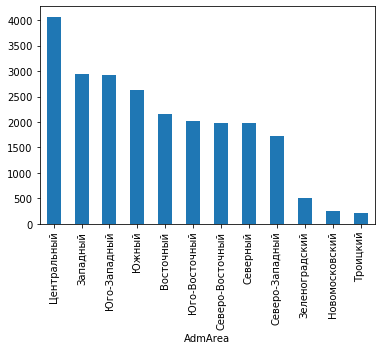

In [40]:
passes_over_220.plot(kind='bar')
plt.savefig('pass_over_220_by_adm_area.png', bbox_inches="tight")

Кодируем png изображение в байт код и создаём html отчёт с заданными данными. Конвертируем отчёт в pdf.

In [41]:
with open('pass_over_220_by_adm_area.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
html = '''<html>
    <head>
        <title>Статистика результатов по ЕГЭ в Москве</title>
        <meta charset="utf-8">
    </head>
    <body>
    <h1>Общее число отличников в городе Москва:</h1>
    <p style='font-size:150%'>''' + str(pass_over_220_total) + '''</p>
    <h2>Распределение отличников по округам:</h2>
    <p style='font-size:130%'>''' + passes_over_220.to_frame().to_html() +'''</p>
    <img src="''' + img + '''" alt="Отличники по округам"/>
    <p style='font-size:130%'>Лучшая школа: ''' + best_school + '''</p>
    </body>
</html>
'''

config = pdfkit.configuration(wkhtmltopdf="C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'gov_exam_stats.pdf', configuration=config, options=options)

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

Создаём заголовки письма, прилагаем данные, открываем соединение с сервером, передаём данные и закрываем соединение.

In [42]:
letter = MIMEMultipart()
letter["From"] = "XXXXXXX"
letter["Subject"] = "Отчет по результатам ЕГЭ"
letter["Content-Type"] = "text/html; charset=utf-8"
letter["To"] = "support@ittensive.com.com"
letter.attach(MIMEText(html, 'html'))
attachement = MIMEBase('application', 'pdf')
attachement.set_payload(open('gov_exam_stats.pdf', 'rb').read())            
attachement.add_header('Content-Disposition',
                      'attachement; filename="gov_exam_stats.pdf"')
encoders.encode_base64(attachement)
letter.attach(attachement)
user = 'XXXXXXX'
password = "XXXXXXX"
server = smtplib.SMTP('smtp.mail.ru', 25)
server.ehlo()
server.starttls()
server.ehlo()
server.login(user, password)
server.sendmail('XXXXXXX',
                'support@ittensive.com',
               letter.as_string())
server.quit()

(221, b'smtp54.i.mail.ru closing connection')